# Nonesuch rock magnetic data
This notebook imports rock magnetic data and plots it stratigraphic context

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib as mpl

%config InlineBackend.figure_format = 'retina'
from matplotlib import rcParams
rcParams['mathtext.default'] = 'regular'

In [3]:
mpl.rc('pdf',fonttype = 42)
#mpl.rc('svg',fonttype = 42)

In [4]:
core_data = pd.read_excel('../Data/rockmag/NonesuchData.xlsx')

In [5]:
core_data.loc[core_data.FaciesInterp == 1.0, 'color'] = "#82CA9C"
core_data.loc[core_data.FaciesInterp == 2.0, 'color'] = "#919396"
core_data.loc[core_data.FaciesInterp == 3.0, 'color'] = "#F27179"

In [6]:
DG18_data = core_data[core_data['DrillCore']=='Devils Gate Outcrop']
PRF18_data = core_data[core_data['DrillCore']=='Potato River Falls Outcrop']
PIR18_data = core_data[core_data['DrillCore']=='Presque Isle River Outcrop']
PC1_samples = core_data[core_data['DrillCore']=='Bear Creek Mining Co. PC-1']
WPB4_samples = core_data[core_data['DrillCore']=='Bear Creek Mining Co. WPB-4']

# Plot Data

PRF18- Plots for Rockmag Data

In [7]:
max(PRF18_data['Mag(wt%)'])

0.009476793478260869

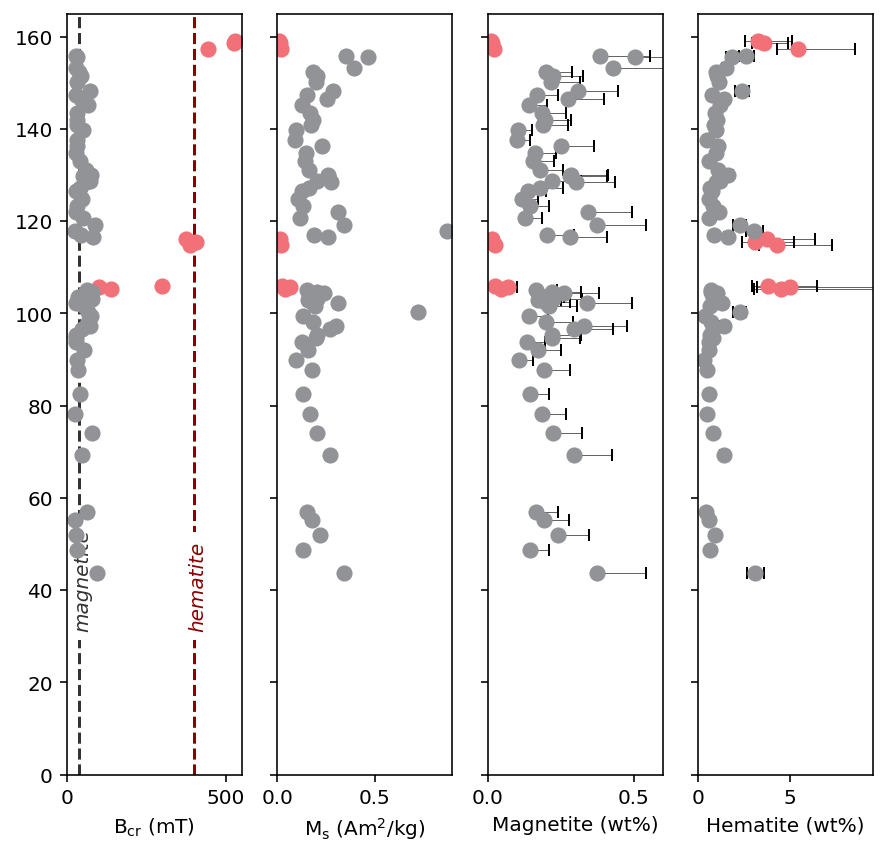

In [8]:
plt.figure(figsize=(11,7))
 
ax2 = plt.subplot(1,6,2)
for n in PRF18_data.index:
    if PRF18_data['Bcr(mT)'][n]=='NaN':
        ax2.scatter(PRF18_data['Bcr(mT)'][n],PRF18_data['Strat(m)'][n],
                    marker='*',s=50, zorder=2)
    else:
        ax2.scatter(PRF18_data['Bcr(mT)'][n],PRF18_data['Strat(m)'][n],
                c=PRF18_data['color'][n],s=50)
ax2.set_xlim(0,550)
ax2.set_xlabel('B$_{cr}$ (mT)')
ax2.vlines(40,0,245,linestyles='--', color ='0.2',zorder =0)
ax2.vlines(400,0,245,linestyles='--',color ='darkred', zorder=0)
ax2.set_ylim (0,165)
#ax2.set_yticklabels([])
ax2.text(20,32,'magnetite',rotation=90, style='italic', color = '0.2', bbox={'color':'white'}, zorder=0)
ax2.text(380,32,'hematite',rotation=90, style='italic', color = 'darkred', bbox={'color':'white'},zorder=0)

ax3 = plt.subplot(1,6,3)
for n in PRF18_data.index:
    if PRF18_data['Ms(Am/kg)'][n]=='NaN':
        ax3.scatter(PRF18_data['Ms(Am/kg)'][n],PRF18_data['Strat(m)'][n],
                    marker='*',s=50, zorder=2)
    else: 
        ax3.scatter(PRF18_data['Ms(Am/kg)'][n],PRF18_data['Strat(m)'][n],
            c=PRF18_data['color'][n],s=50, zorder=1)
ax3.set_xlim(0,0.9) 
ax3.set_xlabel('M$_{s}$ (Am$^2$/kg)')
ax3.set_ylim (0,165)
ax3.set_yticklabels([])

# ax4 = plt.subplot(1,6,4)
# for n in PRF18_data.index:
#     if PRF18_data['Mr(Am/kg)'][n]=='NaN':
#         ax4.scatter(PRF18_data['Mr(Am/kg)'][n],PRF18_data['Strat(m)'][n],
#                     marker='*',s=50, zorder=2)
#     else: 
#         ax4.scatter(PRF18_data['Mr(Am/kg)'][n],PRF18_data['Strat(m)'][n],
#             c=PRF18_data['color'][n],s=50, zorder=1)
# ax4.set_xlim(0,0.15)
# ax4.set_xlabel('M$_{rs}$ (Am$^2$/kg)')
# ax4.set_ylim (0,165)
# ax4.set_yticklabels([])

ax5 = plt.subplot(1,6,4)
for n in PRF18_data.index:
        ax5.scatter(PRF18_data['Mag(wt%)'][n]*100,PRF18_data['Strat(m)'][n],
            c=PRF18_data['color'][n],s=50, zorder=1)
ax5.errorbar(PRF18_data['Mag(wt%)']*100,PRF18_data['Strat(m)'],
             xerr = [(PRF18_data['Mag(wt%)']-PRF18_data['Mag(wt%)'])*100, (PRF18_data['MagUB(wt%)']-PRF18_data['Mag(wt%)'])*100],fmt='none', elinewidth=0.3, ecolor = 'black', capsize = 3, zorder = 0)
ax5.set_xlim(0,0.6) #Note PF18-80 and PF18-40 are not in this!
ax5.set_xlabel('Magnetite (wt%)')
ax5.set_ylim (0,165)
ax5.set_yticklabels([])

ax6 = plt.subplot(1,6,5)
for n in PRF18_data.index:
    ax6.scatter(PRF18_data['Hem(wt%)'][n]*100,PRF18_data['Strat(m)'][n],
                c=PRF18_data['color'][n],s=50, zorder = 1)
ax6.errorbar(PRF18_data['Hem(wt%)']*100,PRF18_data['Strat(m)'],
             xerr = [(PRF18_data['Hem(wt%)']-PRF18_data['HemLB(wt%)'])*100, (PRF18_data['HemUB(wt%)']-PRF18_data['Hem(wt%)'])*100],fmt='none', elinewidth=0.3, ecolor = 'black', capsize = 3, zorder = 0)
ax6.set_ylim (0,165)
ax6.set_xlim(0,9.5)
ax6.set_xlabel('Hematite (wt%)')
ax6.set_yticklabels([])

#plt.savefig('code_output/PRF18_rockmag_v3.svg')
plt.savefig('code_output/PRF18_rockmag_v3.pdf')
plt.show()

## DG18-Plots Rockmag

Find Limits

In [9]:
max(DG18_data['Mag(wt%)'])

0.003877032608695652

Find scale for image

In [10]:
7/165*100

4.242424242424243

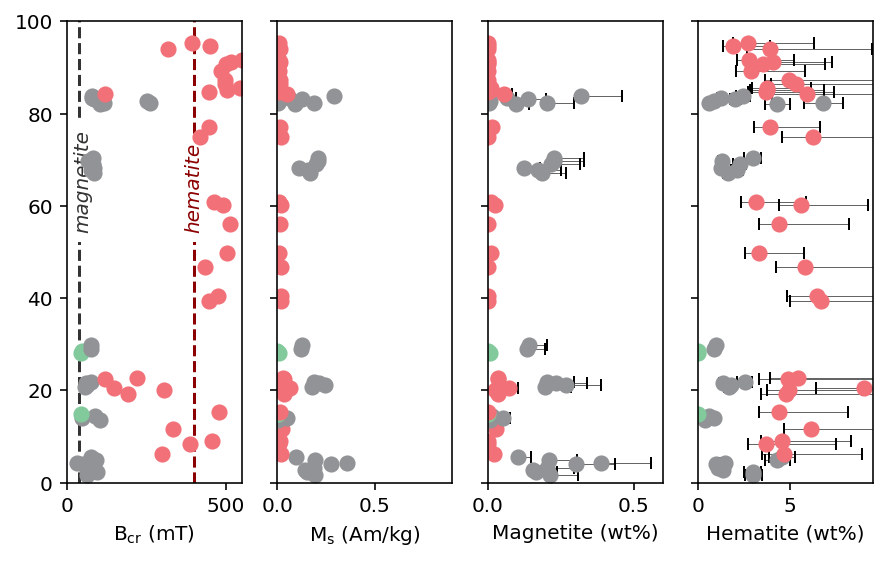

In [11]:
plt.figure(figsize=(11,4.242424242424243))

ax2 = plt.subplot(1,6,2)
for n in DG18_data.index:
    if DG18_data['Bcr(mT)'][n]=='NaN':
        ax2.scatter(DG18_data['Bcr(mT)'][n],DG18_data['Strat(m)'][n],
                    marker='*',s=50, zorder=2)
    else:
        ax2.scatter(DG18_data['Bcr(mT)'][n],DG18_data['Strat(m)'][n],
                c=DG18_data['color'][n],s=50)
ax2.set_xlim(0,550)
ax2.set_xlabel('B$_{cr}$ (mT)')
ax2.vlines(40,0,245,linestyles='--', color = '0.2',zorder =0)
ax2.vlines(400,0,245,linestyles='--',color ='darkred', zorder=0)
ax2.set_ylim (0,100)
#ax2.set_yticklabels([])
ax2.text(20,55,'magnetite',rotation=90, style='italic', color = '0.2', bbox={'color':'white'}, zorder=0)
ax2.text(370,55,'hematite',rotation=90, style='italic', color = 'darkred', bbox={'color':'white'},zorder=0)

ax3 = plt.subplot(1,6,3)
for n in DG18_data.index:
    if DG18_data['Ms(Am/kg)'][n]=='NaN':
        ax3.scatter(DG18_data['Ms(Am/kg)'][n],DG18_data['Strat(m)'][n],
                    marker='*',s=50, zorder=2)
    else: 
        ax3.scatter(DG18_data['Ms(Am/kg)'][n],DG18_data['Strat(m)'][n],
            c=DG18_data['color'][n],s=50, zorder=1)
ax3.set_xlim(0,0.9) 
ax3.set_xlabel('M$_{s}$ (Am/kg)')
ax3.set_ylim (0,100)
ax3.set_yticklabels([])

# ax4 = plt.subplot(1,7,4)
# for n in DG18_data.index:
#     if DG18_data['Mr(Am/kg)'][n]=='NaN':
#         ax4.scatter(DG18_data['Mr(Am/kg)'][n],DG18_data['Strat(m)'][n],
#                     marker='*',s=50, zorder=2)
#     else: 
#         ax4.scatter(DG18_data['Mr(Am/kg)'][n],DG18_data['Strat(m)'][n],
#             c=[DG18_data.R[n],DG18_data.G[n],DG18_data.B[n]],s=80, zorder=1)
# ax4.set_xlim(0,0.075)
# ax4.set_xlabel('M$_{r}$ (Am/kg)')
# ax4.set_ylim (0,100)
# ax4.set_yticklabels([])

ax5 = plt.subplot(1,6,4)
for n in DG18_data.index:
        ax5.scatter(DG18_data['Mag(wt%)'][n]*100,DG18_data['Strat(m)'][n],
            c=DG18_data['color'][n],s=50, zorder=1)
ax5.errorbar(DG18_data['Mag(wt%)']*100,DG18_data['Strat(m)'],
             xerr = [(DG18_data['Mag(wt%)']-DG18_data['Mag(wt%)'])*100, (DG18_data['MagUB(wt%)']-DG18_data['Mag(wt%)'])*100],fmt='none', elinewidth=0.3, ecolor = 'black', capsize = 3, zorder = 0)
ax5.set_xlim(0,0.6) 
ax5.set_xlabel('Magnetite (wt%)')
ax5.set_ylim (0,100)
ax5.set_yticklabels([])

ax6 = plt.subplot(1,6,5)
for n in DG18_data.index:
    ax6.scatter(DG18_data['Hem(wt%)'][n]*100,DG18_data['Strat(m)'][n],
                c=DG18_data['color'][n],s=50, zorder = 1)
ax6.errorbar(DG18_data['Hem(wt%)']*100,DG18_data['Strat(m)'],
             xerr = [(DG18_data['Hem(wt%)']-DG18_data['HemLB(wt%)'])*100, (DG18_data['HemUB(wt%)']-DG18_data['Hem(wt%)'])*100],fmt='none', elinewidth=0.3, ecolor = 'black', capsize = 3, zorder = 0)
ax6.set_ylim(0,100)
ax6.set_xlim(0,9.5)
ax6.set_xlabel('Hematite (wt%)')
ax6.set_yticklabels([])

#plt.savefig('code_output/DG18_rockmag_v3.svg')
plt.savefig('code_output/DG18_rockmag_v3.pdf')
plt.show()

# PIR18-Plots Rockmag

Find limits

In [12]:
max(PIR18_data['Bcr(mT)'])

589.521

Find Scale for Image

In [13]:
6/245*330

8.081632653061224

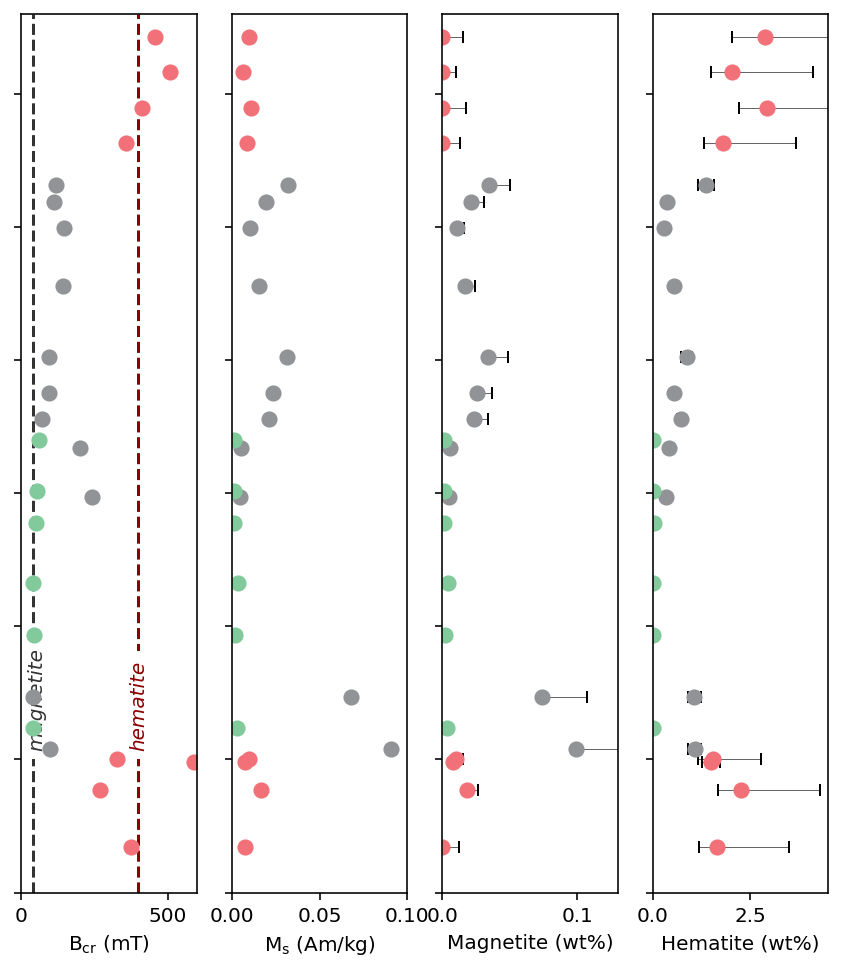

In [14]:
plt.figure(figsize=(11,8.081632653061224))

ax2 = plt.subplot(1,6,2)
for n in PIR18_data.index:
    if PIR18_data['Bcr(mT)'][n]=='NaN':
        ax2.scatter(PIR18_data['Bcr(mT)'][n],PIR18_data['Strat(m)'][n],
                    marker='*',s=50, zorder=2)
    else:
        ax2.scatter(PIR18_data['Bcr(mT)'][n],PIR18_data['Strat(m)'][n],
                c=PIR18_data['color'][n],s=50)
ax2.set_xlim(0,600)
ax2.set_xlabel('B$_{cr}$ (mT)')
ax2.vlines(40,0,330,linestyles='--', color = '0.2',zorder =0)
ax2.vlines(400,0,330,linestyles='--',color ='darkred', zorder=0)
ax2.set_ylim (0,330)
ax2.set_yticklabels([])
ax2.text(20,55,'magnetite',rotation=90, style='italic', color = '0.2', bbox={'color':'white'}, zorder=0)
ax2.text(370,55,'hematite',rotation=90, style='italic', color = 'darkred', bbox={'color':'white'},zorder=0)

ax3 = plt.subplot(1,6,3)
for n in PIR18_data.index:
    if PIR18_data['Ms(Am/kg)'][n]=='NaN':
        ax3.scatter(PIR18_data['Ms(Am/kg)'][n],PIR18_data['Strat(m)'][n],
                    marker='*',s=50, zorder=2)
    else: 
        ax3.scatter(PIR18_data['Ms(Am/kg)'][n],PIR18_data['Strat(m)'][n],
            c=PIR18_data['color'][n],s=50, zorder=1)
ax3.set_xlim(0,0.1) 
ax3.set_xlabel('M$_{s}$ (Am/kg)')
ax3.set_ylim (0,330)
ax3.set_yticklabels([])

# ax4 = plt.subplot(1,7,4)
# for n in PIR18_data.index:
#     if PIR18_data['Mr(Am/kg)'][n]=='NaN':
#         ax4.scatter(PIR18_data['Mr(Am/kg)'][n],PIR18_data['Strat(m)'][n],
#                     marker='*',s=50, zorder=2)
#     else: 
#         ax4.scatter(PIR18_data['Mr(Am/kg)'][n],PIR18_data['Strat(m)'][n],
#             c=[PIR18_data.R[n],PIR18_data.G[n],PIR18_data.B[n]],s=80, zorder=1)
# ax4.set_xlim(0,0.075)
# ax4.set_xlabel('M$_{r}$ (Am/kg)')
# ax4.set_ylim (0,330)
# ax4.set_yticklabels([])

ax5 = plt.subplot(1,6,4)
for n in PIR18_data.index:
        ax5.scatter(PIR18_data['Mag(wt%)'][n]*100,PIR18_data['Strat(m)'][n],
            c=PIR18_data['color'][n],s=50, zorder=1)
ax5.errorbar(PIR18_data['Mag(wt%)']*100,PIR18_data['Strat(m)'],
             xerr = [(PIR18_data['Mag(wt%)']-PIR18_data['Mag(wt%)'])*100, (PIR18_data['MagUB(wt%)']-PIR18_data['Mag(wt%)'])*100],fmt='none', elinewidth=0.3, ecolor = 'black', capsize = 3, zorder = 0)
ax5.set_xlim(0,0.13) 
ax5.set_xlabel('Magnetite (wt%)')
ax5.set_ylim (0,330)
ax5.set_yticklabels([])

ax6 = plt.subplot(1,6,5)
for n in PIR18_data.index:
    ax6.scatter(PIR18_data['Hem(wt%)'][n]*100,PIR18_data['Strat(m)'][n],
                c=PIR18_data['color'][n],s=50, zorder = 1)
ax6.errorbar(PIR18_data['Hem(wt%)']*100,PIR18_data['Strat(m)'],
             xerr = [(PIR18_data['Hem(wt%)']-PIR18_data['HemLB(wt%)'])*100, (PIR18_data['HemUB(wt%)']-PIR18_data['Hem(wt%)'])*100],fmt='none', elinewidth=0.3, ecolor = 'black', capsize = 3, zorder = 0)
ax6.set_ylim(0,330)
ax6.set_xlim(0,4.5)
ax6.set_xlabel('Hematite (wt%)')
ax6.set_yticklabels([])

#plt.savefig('code_output/PIR18_rockmag_v2.svg')
plt.savefig('code_output/PIR18_rockmag_v2.pdf')
plt.show()

# Plot Data

PC1- Plots for Rockmag Data

In [15]:
max(PC1_samples['Mag(wt%)'])

0.0010455967391304348

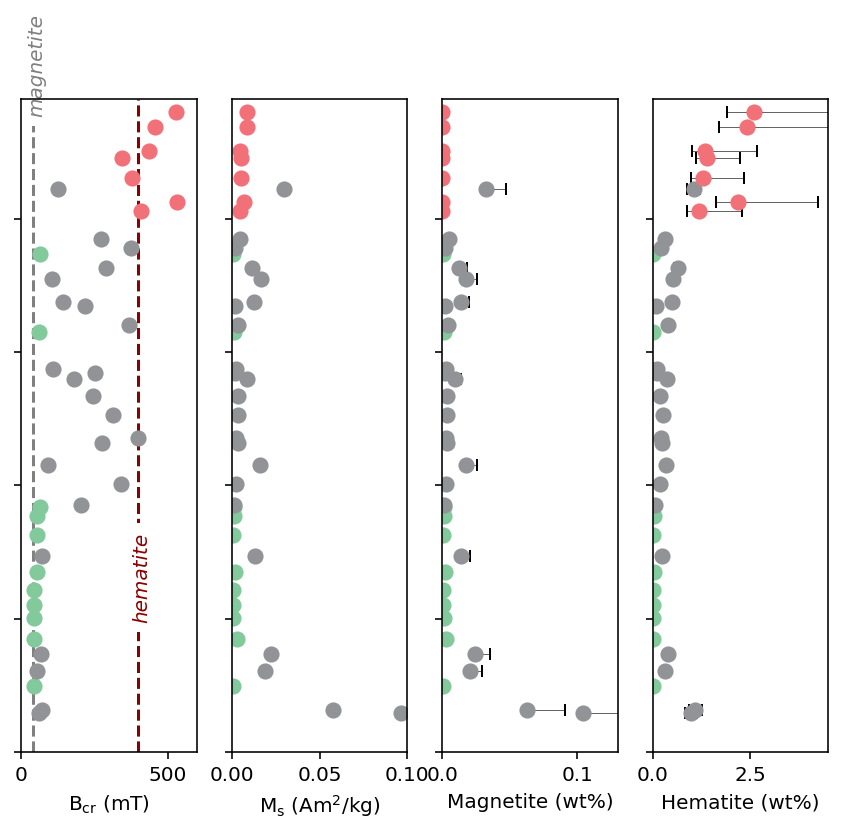

In [16]:
plt.figure(figsize=(11,6))

ax2 = plt.subplot(1,6,2)
for n in PC1_samples.index:
    ax2.scatter(PC1_samples['Bcr(mT)'][n],PC1_samples['Strat(m)'][n],
                c=[PC1_samples['color'][n]],s=50)
ax2.set_xlim(0,600)
ax2.set_xlabel('B$_{cr}$ (mT)')
ax2.vlines(40.5,0,245,linestyles='--', color ='gray',zorder =0)
ax2.vlines(400,0,245,linestyles='--',color ='darkred', zorder=0)
ax2.set_ylim (0,245)
ax2.set_yticklabels([])
ax2.text(20,240,'magnetite',rotation=90, style='italic', color = 'gray', bbox={'color':'white'}, zorder=0)
ax2.text(380,50,'hematite',rotation=90, style='italic', color = 'darkred', bbox={'color':'white'},zorder=0)

ax3 = plt.subplot(1,6,3)
for n in PC1_samples.index:
    ax3.scatter(PC1_samples['Ms(Am/kg)'][n],PC1_samples['Strat(m)'][n],
            c=[PC1_samples['color'][n]],s=50, zorder=1)
ax3.set_xlim(0,0.1)
ax3.set_xlabel('M$_{s}$ (Am$^2$/kg)')
ax3.set_ylim (0,245)
ax3.set_yticklabels([])

# ax4 = plt.subplot(1,6,4)
# for n in PC1_samples.index:
#     ax4.scatter(PC1_samples['Mr [Am/kg]'][n],PC1_samples['StratHeight(m)'][n],
#             c=[PC1_samples.R[n],PC1_samples.G[n],PC1_samples.B[n]],s=80, zorder=1)
# ax4.set_xlim(0,0.0065)
# ax4.set_xlabel('M$_{r}$ (Am/kg)')
# ax4.set_ylim (0,245)
# ax4.set_yticklabels([])

ax5 = plt.subplot(1,6,4)
for n in PC1_samples.index:
    ax5.scatter(PC1_samples['Mag(wt%)'][n]*100,PC1_samples['Strat(m)'][n],
            c=[PC1_samples['color'][n]],s=50, zorder=1)
ax5.errorbar(PC1_samples['Mag(wt%)']*100,PC1_samples['Strat(m)'],
             xerr = [(PC1_samples['Mag(wt%)']-PC1_samples['Mag(wt%)'])*100, (PC1_samples['MagUB(wt%)']-PC1_samples['Mag(wt%)'])*100],fmt='none', elinewidth=0.3, ecolor = 'black', capsize = 3, zorder = 0)
ax5.set_xlim(0,0.13) 
ax5.set_xlabel('Magnetite (wt%)')
ax5.set_ylim (0,245)
ax5.set_yticklabels([])

ax6 = plt.subplot(1,6,5)
for n in PC1_samples.index:
    ax6.scatter(PC1_samples['Hem(wt%)'][n]*100,PC1_samples['Strat(m)'][n],
                c=[PC1_samples['color'][n]],s=50, zorder = 1)
ax6.errorbar(PC1_samples['Hem(wt%)']*100,PC1_samples['Strat(m)'],
             xerr = [(PC1_samples['Hem(wt%)']-PC1_samples['HemLB(wt%)'])*100, (PC1_samples['HemUB(wt%)']-PC1_samples['Hem(wt%)'])*100],fmt='none', elinewidth=0.3, ecolor = 'black', capsize = 3, zorder = 0)
ax6.set_ylim(0,245)
ax6.set_xlim(0,4.5)
ax6.set_xlabel('Hematite (wt%)')
ax6.set_yticklabels([])

#plt.savefig('code_output/PC1_rockmag_v2.svg')
plt.savefig('code_output/PC1_rockmag_v3.pdf')
plt.show()

## WPB4-Plots Rockmag

Find scale for image

In [17]:
6/165*100

3.6363636363636362

In [18]:
max(WPB4_samples['HemUB(wt%)'])

nan

Plotting data

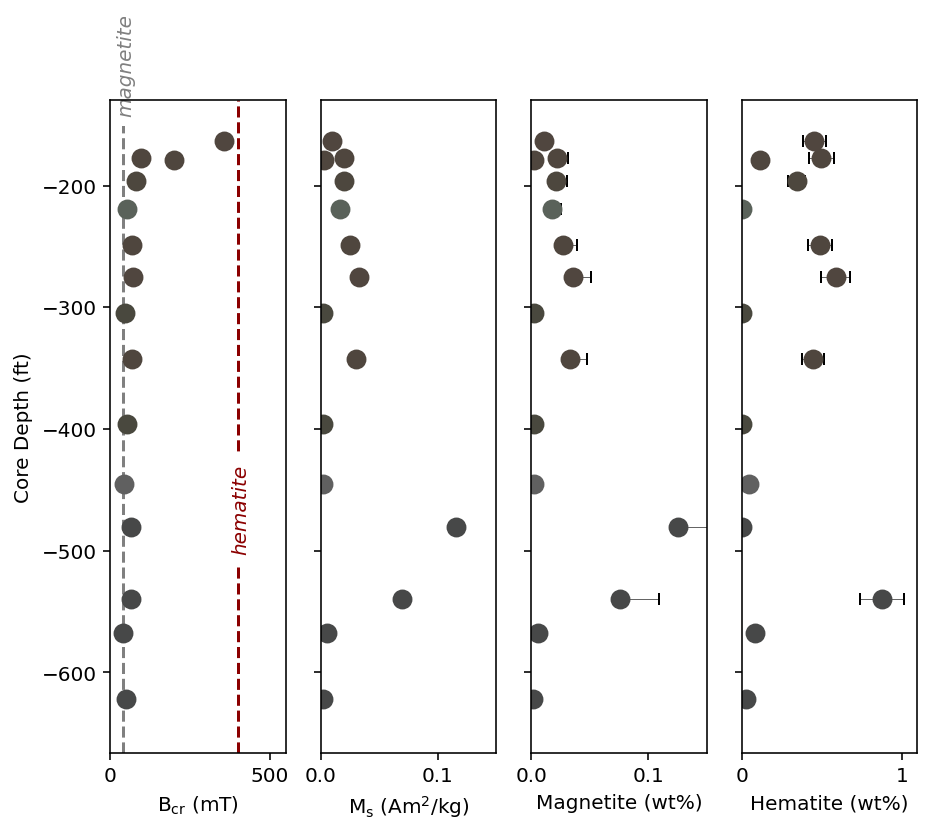

In [19]:
plt.figure(figsize=(11,6))

ax1 = plt.subplot(1,6,1)
# for n in WPB4_samples.index:
#     if WPB4_samples['Bc(mT)'][n]==-1:
#         plt.scatter(WPB4_samples['Bc(mT)'][n],-WPB4_samples['Depth(ft)'][n],
#                     marker='*',s=50, zorder=2)
#     else:
#         plt.scatter(WPB4_samples['Bc(mT)'][n],-WPB4_samples['Depth(ft)'][n],
#                     c=[WPB4_samples.R[n],WPB4_samples.G[n],WPB4_samples.B[n]],s=50, zorder=2)
# ax1.set_ylim (-666, -130)
# ax1.set_xlim(0,550)
# ax1.set_xlabel('B$_{c}$ (mT)')
for n in WPB4_samples.index:
    if WPB4_samples['Bcr(mT)'][n]==-1:
        plt.scatter(WPB4_samples['Bcr(mT)'][n],-WPB4_samples['Depth(ft)'][n],
                    marker='*',s=50, zorder=2)
    else:
        plt.scatter(WPB4_samples['Bcr(mT)'][n],-WPB4_samples['Depth(ft)'][n],
                    color=[WPB4_samples.R[n],WPB4_samples.G[n],WPB4_samples.B[n]],s=80, zorder=2)
plt.ylim (-666, -130)
plt.xlim(0,550)
plt.xlabel('B$_{cr}$ (mT)')
plt.ylabel('Core Depth (ft)')
plt.vlines(40,-666, -130,linestyles='--', color ='gray',zorder =0)
plt.vlines(400,-666, -130,linestyles='--',color ='darkred', zorder=0)
#plt.hlines(-649.5, 0, 550,linestyles='--', color ='black',zorder =0)
#plt.hlines(-626, 0, 550,linestyles='--', color ='black',zorder =0)
#plt.hlines(-176,0, 550,linestyles='--',color ='black', zorder=0)
#plt.hlines(-139.5,0, 550,linestyles='--',color ='black', zorder=0)
plt.text(20,-140,'magnetite',rotation=90, style='italic', color = 'gray', bbox={'color':'white'}, zorder=0.5)
plt.text(380,-500,'hematite',rotation=90, style='italic', color = 'darkred', bbox={'color':'white'},zorder=0.5)
#ax1.set_yticklabels([])

ax2 = plt.subplot(1,6,2)
for n in WPB4_samples.index:
    if WPB4_samples['Ms(Am/kg)'][n]==-1:
        plt.scatter(WPB4_samples['Ms(Am/kg)'][n],-WPB4_samples['Depth(ft)'][n],
                    marker='*',s=50, zorder=2)
    else:
        plt.scatter(WPB4_samples['Ms(Am/kg)'][n],-WPB4_samples['Depth(ft)'][n],
                    color=[WPB4_samples.R[n],WPB4_samples.G[n],WPB4_samples.B[n]],s=80, zorder=2)
ax2.set_xlim(0,.15)
ax2.set_xlabel('M$_{s}$ (Am$^2$/kg)')
ax2.set_ylim (-666, -130)
ax2.set_yticklabels([])

ax3 = plt.subplot(1,6,3)
# for n in WPB4_samples.index:
#     if WPB4_samples['Mr(Am/kg)'][n]==-1:
#         plt.scatter(WPB4_samples['Mr(Am/kg)'][n],-WPB4_samples['Depth(ft)'][n],
#                     marker='*',s=50, zorder=2)
#     else:
#         plt.scatter(WPB4_samples['Mr(Am/kg)'][n],-WPB4_samples['Depth(ft)'][n],
#                     c=[WPB4_samples.R[n],WPB4_samples.G[n],WPB4_samples.B[n]],s=80, zorder=2)
# #ax3.set_xlim(0,.065)
# ax3.set_xlabel('M$_{r}$ (Am$^2$/kg)')
# ax3.set_ylim (-666, -130)
# ax3.set_yticklabels([])
for n in WPB4_samples.index:
    ax3.scatter(WPB4_samples['Mag(wt%)'][n]*100,-WPB4_samples['Depth(ft)'][n],
                    color=[WPB4_samples.R[n],WPB4_samples.G[n],WPB4_samples.B[n]],s=80, zorder=2)
ax3.errorbar(WPB4_samples['Mag(wt%)']*100,-WPB4_samples['Depth(ft)'],
             xerr = [(WPB4_samples['Mag(wt%)']-WPB4_samples['Mag(wt%)'])*100, (WPB4_samples['MagUB(wt%)']-WPB4_samples['Mag(wt%)'])*100],
            fmt='none', elinewidth=0.3, ecolor = 'black', capsize = 3, zorder = 0)
ax3.set_xlim(0,.15)
ax3.set_xlabel('Magnetite (wt%)')
ax3.set_ylim (-666, -130)
ax3.set_yticklabels([])

ax4 = plt.subplot(1,6,4)
for n in WPB4_samples.index:
    ax4.scatter(WPB4_samples['Hem(wt%)'][n]*100,-WPB4_samples['Depth(ft)'][n],
                color=[WPB4_samples.R[n],WPB4_samples.G[n],WPB4_samples.B[n]],s=80, zorder = 1)
ax4.errorbar(WPB4_samples['Hem(wt%)']*100,-WPB4_samples['Depth(ft)'],
             xerr = [(WPB4_samples['Hem(wt%)']-WPB4_samples['HemLB(wt%)'])*100, (WPB4_samples['HemUB(wt%)']-WPB4_samples['Hem(wt%)'])*100],
             fmt='none', elinewidth=0.3, ecolor = 'black', capsize = 3, zorder = 0)
#ax4.set_xlim(0,max(WPB4_samples['HemUB(wt%)'])*100+0.05*100*max(WPB4_samples['HemUB(wt%)']))
ax4.set_xlim(0,1.011+1.011*0.08)
ax4.set_xlabel('Hematite (wt%)')
ax4.set_yticklabels([])
ax4.set_ylim (-666, -130)

#plt.savefig('code_output/WPB4_rockmag_v3.svg')
plt.savefig('code_output/WPB4_rockmag_v3.pdf')
plt.show()